In [1]:
%matplotlib inline

import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from scipy import stats

import numpy as np
import math

from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#KNeighborsClassifier
#LogisticRegressionClassifier
#RandomForestClassifier

import warnings
warnings.filterwarnings(action='ignore')

Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%. The aim here is to obtain an accuracy of 99 - 99.9%.

The examples in the original dataset were in time order, and this time order could presumably be relevant in classification. However, this was not deemed relevant for StatLog purposes, so the order of the examples in the original dataset was randomised, and a portion of the original dataset removed for validation purposes.


Attribute Information:

The shuttle dataset contains 9 attributes all of which are numerical. The first one being time. The last column is the class which has been coded as follows :
* 1 Rad Flow
* 2 Fpv Close
* 3 Fpv Open
* 4 High
* 5 Bypass
* 6 Bpv Close
* 7 Bpv Open

2. Load and prepare the dataset
Load the training data into a DataFrame named df_train_data.
Create binary classification problem; rename some class labels.
Create a DataFrame of nine features named X, drop column 9.
Create a DataFrame of labels named y, select only column 9.
Split the data into a training set and a test set.
3. Create the model
Instantiate a logistic regression classifier with an lbfgs solver.
Fit the classifier to the data.
4. Calculate accuracy
Calculate and print the accuracy of the model on the test data.

5. Dummy classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

6. Confusion matrix
Print the confusion matrix.

7. Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix() function from above to plot a nicer-looking confusion matrix.

8. Calculate metrics
Print the F₁, Fᵦ, precision, recall, and accuracy scores.

9. Print a classification report
10. Plot the ROC curve and AUC
Calculate AUC and plot the curve.

11. Plot precision-recall curve
Plot the precision-recall curve for the model above.

Find the best value for C in the logistic regression classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

12. Cross-validation
Perform five-fold cross-validation for a logistic regression classifier. Print the five accuracy scores and the mean validation score.

13. Is this really linear?
Your linear classifier is not giving you better accuracy than the dummy classifier. Suppose that the data was not linearly separable. Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the logistic regression from above? What does that tell you about the data?

14. Random forest
Next, instantiate and fit a random forest classifier and calculate the accuracy of that model.

Now, answer some additional questions about analyzing model performance.

In [2]:
colnames=['Time','A','B','C','D','E','F','G','H','target']
df_train_data = pd.read_csv('shuttle.tst.csv', names=colnames, header=None)
df_train_data.head()
        
# mapping = [1: 'Rad Flow',2: 'Fpv Close', 3: 'Fpv Open',4: 'High',5: 'Bypass',6: 'Bpv Close',7: 'Bpv Open']

,Time,A,B,C,D,E,F,G,H,target
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [3]:
# creating a binary label using values =1 at target
df_train_data['target_flow'] = df_train_data['target'] < 2

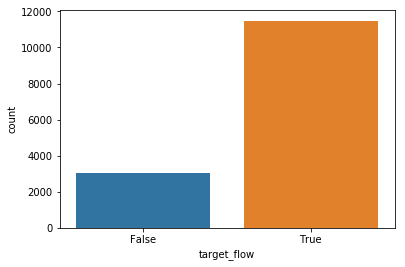

In [4]:
sns.countplot(x=df_train_data['target_flow'])
plt.show()

In [26]:
X = df_train_data.drop(columns=['target_flow','target'])
y = df_train_data['target_flow']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# creating lr model
lr = LogisticRegression(solver='lbfgs', random_state=4)
lr.fit(X, y)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# model accuracy is high with no tuning at 94%

accuracy score: 0.9393103448275862
# of iterations 100
Score on training data:  0.9330172413793103
Score on test data:  0.9393103448275862


In [8]:
# comparing high accuracy of our model to a dummy model

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)


0.8

The dummy classifer randomly guessing correctly 80% of the time so the lr model of 94% is not so great.


In [9]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[2273   47]
 [ 129  451]]


In [10]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

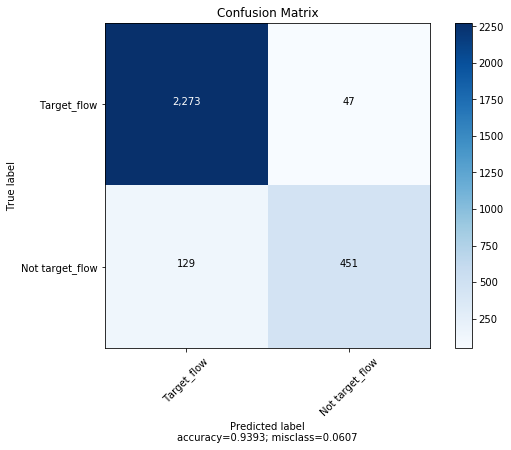

In [11]:
plot_confusion_matrix(cm=confusion, target_names = ['Target_flow', 'Not target_flow'], title = 'Confusion Matrix',normalize=False)

In [12]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.94
Precision score: 0.95
Recall score: 0.98
F1 score: 0.96
Fbeta score favoring precision: 0.95
FBeta score favoring recall: 0.97


In [13]:
report = classification_report(y_test, predictions, target_names=['Target_flow', 'Not target_flow'])
print(report)

                 precision    recall  f1-score   support

    Target_flow       0.91      0.78      0.84       580
Not target_flow       0.95      0.98      0.96      2320

       accuracy                           0.94      2900
      macro avg       0.93      0.88      0.90      2900
   weighted avg       0.94      0.94      0.94      2900



In [14]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[9.99110441e-01 5.50703343e-01 9.99849958e-01 6.43910213e-03
 9.75703032e-01 9.96380727e-01 9.91156120e-01 9.83731526e-01
 1.50980397e-01 9.71520410e-01 9.75251339e-01 2.62965047e-01
 1.17461372e-08 9.99636704e-01 9.99226785e-01 9.90406178e-01
 4.98816371e-01 9.97465125e-01 9.97997195e-01 9.09405209e-01
 8.62899244e-01 9.57498644e-01 9.99892139e-01 4.97497201e-01
 9.90862015e-01 6.01036248e-01 9.84116077e-01 9.97692164e-01
 9.87183760e-01]


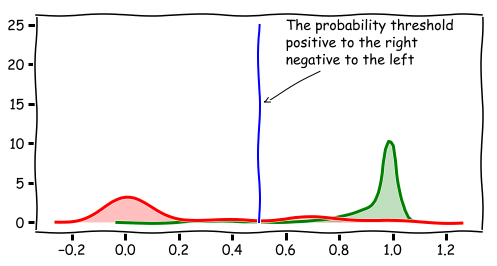

In [15]:
# plotting the decision threshold in the model occuring at 0.5

pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.         0.         0.00172414 0.00172414 0.00344828 0.00344828
 0.01034483 0.01034483 0.01206897 0.01206897 0.0137931  0.0137931
 0.01551724 0.01551724 0.01724138 0.01724138 0.01896552 0.01896552
 0.02068966 0.02068966 0.02413793 0.02413793 0.02586207 0.02586207
 0.02758621 0.02758621 0.02931034 0.02931034 0.03103448]
[4.31034483e-04 5.60344828e-02 5.60344828e-02 4.84051724e-01
 4.84051724e-01 6.92241379e-01 6.92241379e-01 7.34482759e-01
 7.34482759e-01 7.47413793e-01 7.47413793e-01 7.94827586e-01
 7.94827586e-01 7.97844828e-01 7.97844828e-01 8.02586207e-01
 8.02586207e-01 8.03017241e-01 8.03017241e-01 8.07758621e-01
 8.07758621e-01 8.08620690e-01 8.08620690e-01 8.09482759e-01
 8.09482759e-01 8.10344828e-01 8.10344828e-01 8.18103448e-01
 8.18103448e-01]
[0.99998808 0.99956084 0.99955491 0.98775974 0.98772039 0.96086736
 0.96059104 0.939946   0.93970092 0.933152   0.93305768 0.90894899
 0.90883484 0.9075465  0.90751042 0.90425275 0.9042491  0.90417031
 0.90410728 0.90270667 0.902440

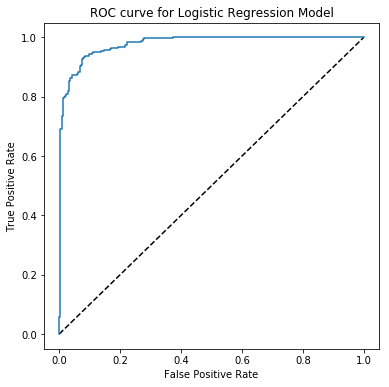

In [17]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

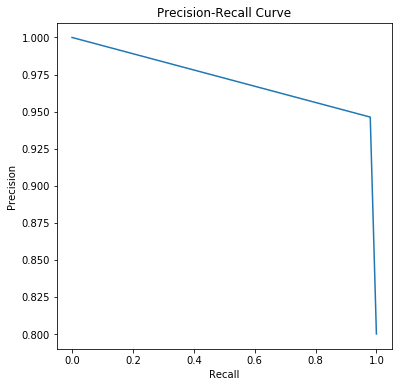

In [18]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [19]:
# looking at effects on model by L2 regularization

lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=200, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# using and L2 and 100 iterations as parameters, accuracy has increased and underfitting has improved. The range of coefficients is reduced
# from -1.5 to 2.5 without L2 to between -1 to 1.5 or from a about a 4 point spread to a 2.5 point spread.

Score on training data:  0.9622413793103448
Score on test data:  0.9720689655172414


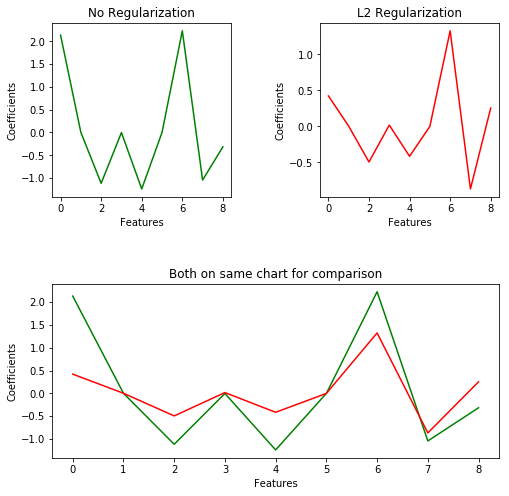

In [20]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

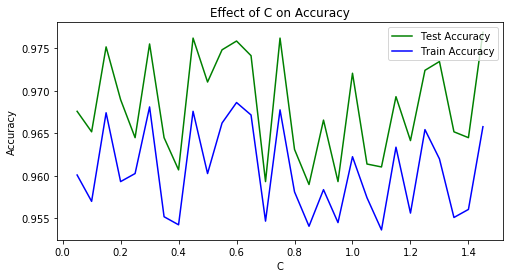

In [21]:
# looking at effect of various values of C on the model

c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=200, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

# The minimum value of C occurs somewhere at about C = 0.7.

In [25]:
df_train_data.shape

(14500, 11)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.93232759 0.94008621 0.93965517 0.92715517 0.93232759]
Mean cross-validation score: 0.934
